/var/folders/wk/3bm5y6bs3p1_jch3pxh3cx7w0000gp/T/ipykernel_80882/4193832896.py:13: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  energy = trapz(data['Power'], data['Time'])
/var/folders/wk/3bm5y6bs3p1_jch3pxh3cx7w0000gp/T/ipykernel_80882/4193832896.py:13: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  energy = trapz(data['Power'], data['Time'])


Metrics for MG without Horner (LWOH):
Total Energy (Joules): 10397.37
Standard Deviation: 5.85
Maximum: 76.44
Minimum: 20.42
Average: 34.39
Median: 32.93

Metrics for MG with Horner (LWH):
Total Energy (Joules): 7349.86
Standard Deviation: 6.36
Maximum: 69.05
Minimum: 22.68
Average: 35.32
Median: 33.32

Energy reduction: 29.31%

Comparative Table:
                  Metric          LWOH          LWH
0  Total Energy (Joules)  10397.366332  7349.859330
1     Standard Deviation      5.852519     6.357108
2                Maximum     76.440045    69.047768
3                Minimum     20.417398    22.679104
4                Average     34.386128    35.320298
5                 Median     32.925474    33.318429
6             Total Cost      0.001030     0.000728


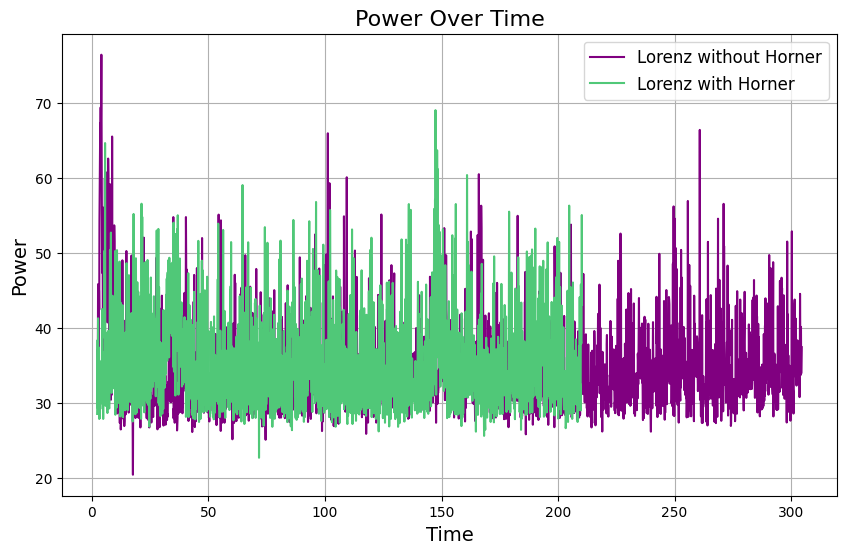

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Load the data from the CSV files
lw_data = pd.read_csv('MGWOH.csv')
lh_data = pd.read_csv('MGWH.csv')
lw_data.columns = ['Time', 'Power']
lh_data.columns = ['Time', 'Power']

# Function to calculate metrics
def calculate_metrics(data):
    energy = trapz(data['Power'], data['Time'])
    std_dev = data['Power'].std()
    max_power = data['Power'].max()
    min_power = data['Power'].min()
    mean_power = data['Power'].mean()
    median_power = data['Power'].median()
    return {
        "Total Energy (Joules)": energy,
        "Standard Deviation": std_dev,
        "Maximum": max_power,
        "Minimum": min_power,
        "Average": mean_power,
        "Median": median_power
    }

# Calculate metrics for LWOH
metrics_lw = calculate_metrics(lw_data)

# Calculate metrics for LWH
metrics_lh = calculate_metrics(lh_data)

# Print metrics for LWOH
print("Metrics for MG without Horner (LWOH):")
for key, value in metrics_lw.items():
    print(f"{key}: {value:.2f}")

# Print metrics for LWH
print("\nMetrics for MG with Horner (LWH):")
for key, value in metrics_lh.items():
    print(f"{key}: {value:.2f}")

# Calculate total energy for lw_data
energy_lw = metrics_lw["Total Energy (Joules)"]

# Calculate total energy for lh_data
energy_lh = metrics_lh["Total Energy (Joules)"]


reduction_percentage = ((energy_lw - energy_lh) / energy_lw) * 100
print(f"\nEnergy reduction: {reduction_percentage:.2f}%")

# Convert energy from joules to kWh
energia_lw_kwh = energy_lw / 3600000
energia_lh_kwh = energy_lh / 3600000

# Calculate total cost for lw_data
custo_total_lw = energia_lw_kwh * custo_por_kwh

# Calculate total cost for lh_data
custo_total_lh = energia_lh_kwh * custo_por_kwh

# Create a comparative table for metrics and costs
data = {
    "Metric": ["Total Energy (Joules)", "Standard Deviation", "Maximum", "Minimum", "Average", "Median", "Total Cost"],
    "LWOH": [metrics_lw["Total Energy (Joules)"], metrics_lw["Standard Deviation"], metrics_lw["Maximum"],
             metrics_lw["Minimum"], metrics_lw["Average"], metrics_lw["Median"], custo_total_lw],
    "LWH": [metrics_lh["Total Energy (Joules)"], metrics_lh["Standard Deviation"], metrics_lh["Maximum"],
            metrics_lh["Minimum"], metrics_lh["Average"], metrics_lh["Median"], custo_total_lh]
}

df = pd.DataFrame(data)
print("\nComparative Table:")
print(df)

# Plotting with adjusted color for Lorenz with Horner (emerald green)
plt.figure(figsize=(10, 6))

# Lorenz without Horner
plt.plot(lw_data['Time'], lw_data['Power'], color="purple", label="Lorenz without Horner")

# Lorenz with Horner - using a light emerald green color
plt.plot(lh_data['Time'], lh_data['Power'], color="#50C878", label="Lorenz with Horner")  # Emerald green

# Customizations
plt.title("Power Over Time", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display plot
plt.show()